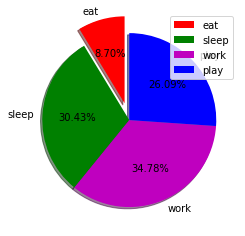

In [8]:
import matplotlib.pyplot as plt

activites = ['eat','sleep','work','play']
slices = [2,7,8,6]
color = ['r','g','m','b']

plt.pie(slices,labels=activites,colors=color,startangle=90,shadow=True,
       explode=(0.2,0,0,0),autopct='%1.2f%%')
plt.legend()
plt.show()

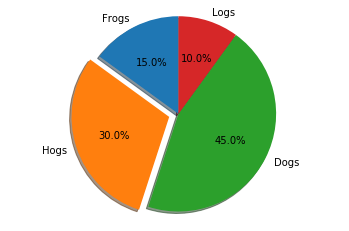

In [11]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

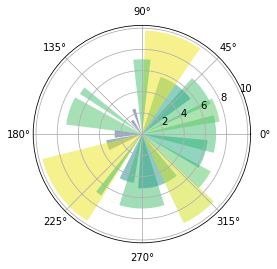

In [16]:
#Bar Chart on polar axis
import numpy as np
import matplotlib.pyplot as plt

#Fixing random state for reproducibility
np.random.seed(19680801)

#Compute pie slices
N = 20
vtheta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10*np.random.rand(N)
width=np.pi/4*np.random.rand(N)
colors = plt.cm.viridis(radii/10.)

ax = plt.subplot(111,projection='polar')
ax.bar(theta,radii,width=width,bottom=0.0,color=colors,alpha=0.5)
plt.show()

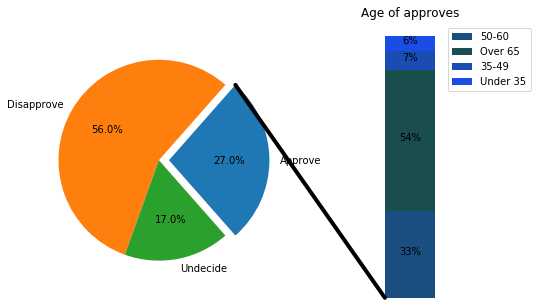

In [21]:
#Bar of Pie
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

#make figure and assign axis objects
fig = plt.figure(figsize=(9,5.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

#Pie chart paramenters
ratios = [.27,.56,.17]
labels = ['Approve','Disapprove','Undecide']
explode = [0.1,0,0]

#Rotate so that first widge is splite by the x-axis
angle = -180*ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)
#bar chart parameters
xpos = 0
bottom = 0
ratios = [.33,.54,.07,.06]
width = .2
colors = [[.1,.3,.5],[.1,.3,.3],[.1,.3,.7],[.1,.3,.9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos,height,width,bottom=bottom,color=colors[j])
    ypos = bottom+ax2.patches[j].get_height()/2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')
ax2.set_title('Age of approves')
ax2.legend(('50-60','Over 65','35-49','Under 35'))
ax2.axis('off')
ax2.set_xlim(-2.5*width,2.5*width)

#use Connection Patch to drow lines between the two plots
#get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])


#draw top connection line
x = r*np.cos(np.pi/180*theta2)+center[0]
y = np.sin(np.pi/180*theta2)+center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0,0,0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

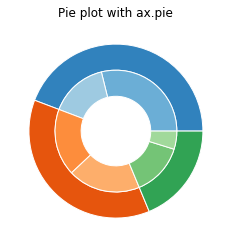

In [24]:
# Nested pie Charts
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1,2,5,6,9,10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect='equal',title='Pie plot with ax.pie')
plt.show()

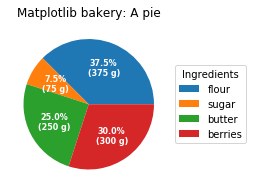

In [29]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()